**This notebook provide the best practices to consume covid-lake API.**

In [1]:
# General Import

import pandas as pd
import numpy as np
import re
import seaborn as sns

import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
%matplotlib inline

#!pip install scipy
from scipy.stats import pearsonr
import requests
import io
import datetime
import os

import scipy.stats as stats

In [2]:
url="https://covid.ourworldindata.org/data/owid-covid-data.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [4]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
     

### Colunas a serem analisadas: 

stringency_index = Índice de rigidez, medida composta com base em nove indicadores de resposta, incluindo fechamento de escolas, local de trabalho fechamentos e proibições de viagens, redimensionados para um valor de 0 a 100 (100 = mais estrito). Se as políticas variam no nível subnacional, o índice é mostrado como o nível de resposta da sub-região mais restrita.

In [5]:
df2 = df[['date', 'location', 'total_cases_per_million', 'total_deaths_per_million', 'new_cases_per_million', 'new_deaths_per_million', 
          'total_tests_per_thousand', 'stringency_index', 'population_density', 'median_age', 'aged_65_older',
          'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'life_expectancy', 'human_development_index']]

df2.describe()

,total_cases_per_million,total_deaths_per_million,new_cases_per_million,new_deaths_per_million,total_tests_per_thousand,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index
count,56023.000000,46401.000000,58957.000000,58957.000000,23503.000000,48463.000000,56793.000000,53288.000000,52483.000000,53010.000000,52597.000000,35054.000000,58866.000000,51429.000000
mean,3511.598780,101.327429,43.422690,0.744304,87.442633,56.865433,358.689117,31.160141,9.162633,5.788600,20553.277604,12.499409,73.918564,0.721653
std,6937.605905,188.239970,141.285473,3.154408,176.129749,25.714960,1633.173704,9.046336,6.292971,4.292195,20281.059857,19.466108,7.399956,0.153329
min,0.001000,0.000000,-2212.545000,-67.901000,0.000000,0.000000,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,53.280000,0.354000
25%,97.502000,4.233000,0.000000,0.000000,4.374000,39.810000,37.728000,23.200000,3.548000,2.085000,5321.444000,0.500000,69.870000,0.592000
50%,659.371000,22.190000,2.356000,0.000000,22.707000,60.190000,88.125000,30.900000,6.933000,4.321000,13913.839000,2.000000,75.290000,0.752000
75%,3732.415000,101.916000,28.494000,0.317000,93.619500,77.780000,214.243000,39.700000,14.738000,9.395000,30155.152000,18.800000,79.380000,0.847000
max,86326.280000,1411.522000,8652.658000,215.382000,2157.180000,100.000000,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,86.750000,0.953000


In [6]:
df2.corr().style.background_gradient(cmap='Blues').format("{:.2f}")

#idade mediana, renda per capta, expectativa de vida, idh

,total_cases_per_million,total_deaths_per_million,new_cases_per_million,new_deaths_per_million,total_tests_per_thousand,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index
total_cases_per_million,1.00,0.64,0.53,0.29,0.56,0.04,0.05,0.21,0.12,0.12,0.36,-0.25,0.28,0.29
total_deaths_per_million,0.64,1.00,0.35,0.28,0.22,-0.01,-0.03,0.29,0.31,0.32,0.27,-0.27,0.34,0.34
new_cases_per_million,0.53,0.35,1.00,0.35,0.39,0.10,0.02,0.20,0.17,0.17,0.19,-0.19,0.18,0.21
new_deaths_per_million,0.29,0.28,0.35,1.00,0.10,0.13,-0.02,0.16,0.16,0.16,0.08,-0.15,0.13,0.16
total_tests_per_thousand,0.56,0.22,0.39,0.10,1.00,-0.14,0.17,0.23,0.14,0.15,0.46,-0.21,0.29,0.34
stringency_index,0.04,-0.01,0.10,0.13,-0.14,1.00,-0.08,-0.17,-0.19,-0.19,-0.16,-0.02,-0.11,-0.13
population_density,0.05,-0.03,0.02,-0.02,0.17,-0.08,1.00,0.14,0.07,0.04,0.30,-0.03,0.21,0.15
median_age,0.21,0.29,0.20,0.16,0.23,-0.17,0.14,1.00,0.91,0.90,0.63,-0.69,0.85,0.89
aged_65_older,0.12,0.31,0.17,0.16,0.14,-0.19,0.07,0.91,1.00,0.99,0.49,-0.57,0.73,0.76
aged_70_older,0.12,0.32,0.17,0.16,0.15,-0.19,0.04,0.90,0.99,1.00,0.48,-0.55,0.72,0.75


#### Observações interessantes:
 total_cases_per_million  e new_deaths_smoothed_per_milliotem baixa relação com stringency_index	 
 
 extreme_poverty tem baixa correlação negativa com nivel de rigidez, new cases, new deaths , total cases
 
 gdp_per_capita tem relação fraca a moderada com total_tests_per_thousand	
 
 densidade populacional tem correlação desprezível com total de casos, novos casos e novas mortes

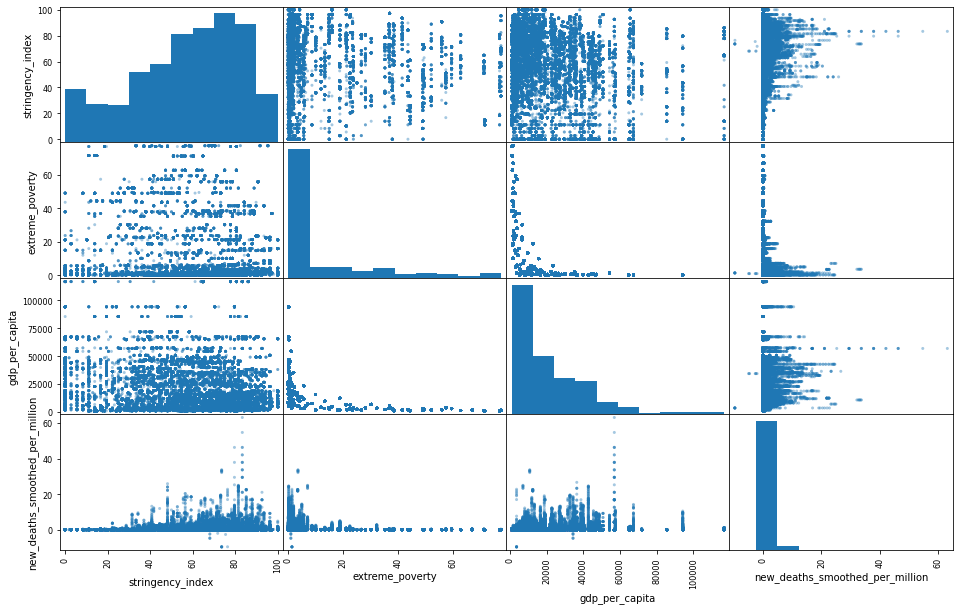

In [7]:
from pandas.plotting import scatter_matrix

attributes = ["stringency_index", "extreme_poverty", "gdp_per_capita", "new_deaths_smoothed_per_million"]

scatter_matrix(df[attributes], alpha=.4, figsize=(16, 10));

In [8]:
#adicionando coluna referente aos meses para analises de médias mensais
df2['month'] = df2['date'].dt.month

/home/ubuntu/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
df_eua = df2[(df2["location"] == "United States") & (df2["month"] < 11)]
df_br = df2[(df2["location"] == "Brazil") & (df2["month"] < 11)]
df_ge = df2[(df2["location"] == "Germany") & (df2["month"] < 11)]
df_fr = df2[(df2["location"] == "France") & (df2["month"] < 11)]
df_it = df2[(df2["location"] == "Italy") & (df2["month"] < 11)]
df_pt = df2[(df2["location"] == "Portugal") & (df2["month"] < 11)]
df_sp = df2[(df2["location"] == "Spain") & (df2["month"] < 11)]

In [10]:
df_hm = df2[["population_density", "total_deaths_per_million", "extreme_poverty", "median_age", "gdp_per_capita", 
     "life_expectancy","human_development_index", "total_tests_per_thousand"]]

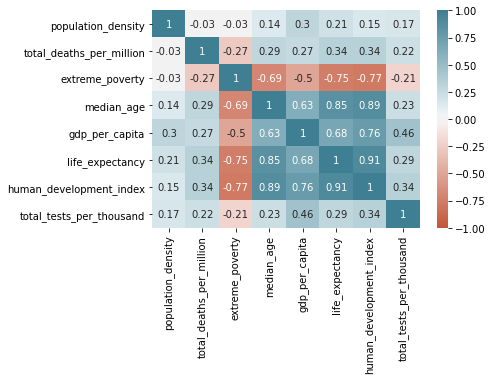

In [11]:
sns.heatmap(round(df_hm.corr(), 2), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 
                    220, as_cmap=True), annot=True)

plt.title("HeatMap - World",  fontsize=20)

plt.show;


In [21]:
#Média Mensal do Índice de Rigor
si_meanbr = round(df_br.groupby("month")["stringency_index"].mean(), 1)
si_meanfr = round(df_fr.groupby("month")["stringency_index"].mean(), 1)
si_meanit = round(df_it.groupby("month")["stringency_index"].mean(), 1)
si_meansp = round(df_sp .groupby("month")["stringency_index"].mean(), 1)
si_meaneua = round(df_eua.groupby("month")["stringency_index"].mean(), 1)

date = si_meanbr.index.tolist() 

import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()

fig.add_trace(go.Scatter(x= date, y= si_meanbr.values, mode='lines+markers',marker_color='red', name='Brazil'))
fig.add_trace(go.Scatter(x= date, y= si_meanfr.values, mode='lines+markers',marker_color='green', name='France'))
fig.add_trace(go.Scatter(x= date, y= si_meanit.values, mode='lines+markers',marker_color='violet', name='Italy'))
fig.add_trace(go.Scatter(x= date, y= si_meansp.values, mode='lines+markers',marker_color='#EEEF63', name='Spain'))
fig.add_trace(go.Scatter(x= date, y= si_meaneua.values, mode='lines+markers',marker_color='blue', name='USA'))

fig.update_layout(title=' ', template='plotly_dark', yaxis_title="Monthly Mean",xaxis_title="Month")

fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 1, dtick = 1))


In [13]:
# Média Mensal de Novos Casos Por Milhão

ncpm_meanbr = round(df_br.groupby("month")["new_cases_per_million"].mean(), 1)
ncpm_meanfr = round(df_fr.groupby("month")["new_cases_per_million"].mean(), 1)
ncpm_meanit = round(df_it.groupby("month")["new_cases_per_million"].mean(), 1)
ncpm_meansp = round(df_sp.groupby("month")["new_cases_per_million"].mean(), 1)
ncpm_meaneua = round(df_eua.groupby("month")["new_cases_per_million"].mean(), 1)

date = ncpm_meanbr.index.tolist() 

fig = go.Figure()


fig.add_trace(go.Scatter(x= date, y= ncpm_meanbr.values, mode='lines+markers',marker_color='red', name='Brazil'))
fig.add_trace(go.Scatter(x= date, y= ncpm_meanfr.values, mode='lines+markers',marker_color='green', name='France'))
fig.add_trace(go.Scatter(x= date, y= ncpm_meanit.values, mode='lines+markers',marker_color='violet', name='Italy'))
fig.add_trace(go.Scatter(x= date, y= ncpm_meansp.values, mode='lines+markers',marker_color='#EEEF63', name='Spain'))
fig.add_trace(go.Scatter(x= date, y= ncpm_meaneua.values, mode='lines+markers',marker_color='blue', name='USA'))

fig.update_layout(title=' ', 
                  template='plotly_dark', yaxis_title="Monthly mean",xaxis_title="Month")

fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 1, dtick = 1))

In [14]:
# Media de Novas mortes por milhão 

sns.set_style("darkgrid")

ncdm_meanbr = round(df_br.groupby("month")["new_deaths_per_million"].mean(), 1)

ncdm_meanfr = round(df_fr.groupby("month")["new_deaths_per_million"].mean(), 1)
ncdm_meanit = round(df_it.groupby("month")["new_deaths_per_million"].mean(), 1)
ncdm_meansp = round(df_sp.groupby("month")["new_deaths_per_million"].mean(), 1)

ncdm_meaneua = round(df_eua.groupby("month")["new_deaths_per_million"].mean(), 1)


fig = go.Figure()


fig.add_trace(go.Scatter(x= date, y= ncdm_meanbr.values, mode='lines+markers',marker_color='red', name='Brazil'))
fig.add_trace(go.Scatter(x= date, y= ncdm_meanfr.values, mode='lines+markers',marker_color='green', name='France'))
fig.add_trace(go.Scatter(x= date, y= ncdm_meanit.values, mode='lines+markers',marker_color='violet', name='Italy'))
fig.add_trace(go.Scatter(x= date, y= ncdm_meansp.values, mode='lines+markers',marker_color='#EEEF63', name='Spain'))
fig.add_trace(go.Scatter(x= date, y= ncdm_meaneua.values, mode='lines+markers',marker_color='blue', name='USA'))

fig.update_layout(title=' ', 
                  template='plotly_dark', yaxis_title="Monthly mean",xaxis_title="Mean")

fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 1, dtick = 1))

#### Conclusion

O Índice de rigor dos paises possui uma relação desprezivel com os numeros totais de casos, novos casos suavizados e mortes suavizadas. 

A extrema pobreza e a densidade populacional tem uma correlação desprezivel negativa com numeros totais de casos, novos casos suavizados e mortes suavizadas. 

A renda per capta tem uma correlação de 0.48 com total de testes por milhão. O que é considerado baixo á moderado. O que é interessante olhar o ponto de vista de alguns países com alta renda per capta realizarem testes em maior quantidade. 

Dando um "zoom" em alguma dessa variáveis em dois países com densidade populacionais distintas (Brasil e Índia) a partir de Heatmaps, observa-se que as correlações de casos e mortes de covid com a alta densidade populacional foram desprezíveis para ambas. 
 
Como notado pelo gráfico 1, onde se compara o índice de rigor entre os países: Brasil, India, Alemanha e França, que possuem características distintas em especial para o momento atual em relação a pandemia. É notório o alto rigor da Índia em relação aos demais países. 



## *Developed by*

 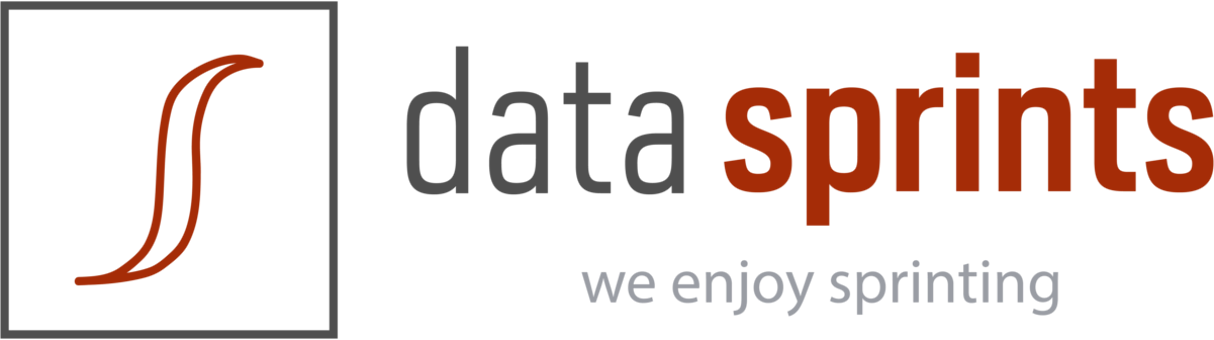